In [ ]:
!pip3 install --upgrade pandas

In [5]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2
import matplotlib.pyplot as plt
import numpy as np

In [175]:
with bz2.open('09_prepared.pkl.bz2', 'rb') as f:
    df1 = pickle.load(f)
with bz2.open('10_prepared.pkl.bz2', 'rb') as f:
    df2 = pickle.load(f)
with bz2.open('11_prepared.pkl.bz2', 'rb') as f:
    df3 = pickle.load(f)

In [177]:
df = pd.concat([df1, df2, df3])
df

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1538855,1283228
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,267307,8873113
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,610220,12712899
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,441497,21535283
4,2020-09-01 18:42:31,0706023F-6BEC-EA11-B444-005056A7539A,0,5732396,61,97,2.0,88.00,False,1065358,642341
...,...,...,...,...,...,...,...,...,...,...,...
46496617,2020-11-30 15:05:50,960A650A-0533-EB11-B444-005056A7539A,0,7728976,21420,12831,1.0,81.00,False,1423663,13726324
46496618,2020-11-30 13:49:02,BB4E748A-FB32-EB11-B444-005056A7539A,0,2284211,22397,12657,1.0,76.00,False,406658,17134146
46496619,2020-11-30 14:44:37,223916DB-0133-EB11-B444-005056A7539A,0,7125472,22932,13532,1.0,34.00,False,1319934,3130473
46496620,2020-11-30 15:52:27,6DCE9E06-0B33-EB11-B444-005056A7539A,0,4877097,23954,12831,1.0,152.00,False,897152,10045346


In [9]:
df.describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07
mean,7.765869e+05,1.763064e+04,1.045977e+04,1.427065e+00,1.149112e+02,8.446032e+05,1.170384e+07
std,2.032896e+06,1.103226e+04,8.794764e+03,3.101411e+01,1.072201e+02,5.388947e+05,6.760102e+06
min,0.000000e+00,4.600000e+01,-9.999000e+03,-2.755000e+00,-1.022110e+03,0.000000e+00,2.000000e+00
25%,0.000000e+00,1.452600e+04,3.850000e+02,1.000000e+00,4.800000e+01,3.650470e+05,5.848724e+06
50%,0.000000e+00,1.943500e+04,1.358100e+04,1.000000e+00,8.900000e+01,8.150010e+05,1.170182e+07
75%,0.000000e+00,2.455800e+04,1.630400e+04,1.000000e+00,1.501100e+02,1.288708e+06,1.755596e+07
max,6.673056e+06,3.866000e+04,2.194300e+04,5.000000e+03,3.840000e+04,1.944074e+06,2.341787e+07


In [178]:
df['day'] = df['date'].dt.date
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int,day
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1538855,1283228,2020-09-01
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,267307,8873113,2020-09-01
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,610220,12712899,2020-09-01
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,441497,21535283,2020-09-01
4,2020-09-01 18:42:31,0706023F-6BEC-EA11-B444-005056A7539A,0,5732396,61,97,2.0,88.00,False,1065358,642341,2020-09-01


Step 1. Delete obvious outliers

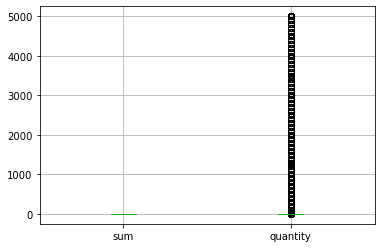

In [179]:
outliers = df[['id_card_int', 'sum', 'quantity']][(df['sum'] == 0) & (df['is_green'] == False)]
outliers[['sum', 'quantity']].boxplot()
outliers = list(outliers['id_card_int'])

Step 2. Try some statistics (omg)

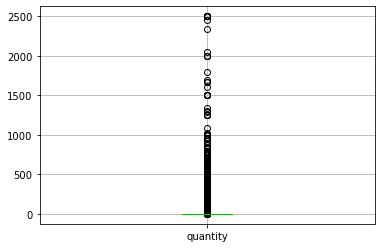

In [180]:
# Find mean quantities for each cardid

quantity_means = df[['id_card_int', 'quantity']].groupby('id_card_int').mean().sort_values('quantity', ascending=False)
quantity_means.boxplot()

In [181]:
# Cut the boxplot
quantity_means[quantity_means['quantity'] > 1100]

,quantity
id_card_int,
664126,2500.500000
1834558,2500.500000
464885,2500.500000
1284116,2500.500000
1374648,2500.500000
1500905,2500.500000
1252303,2500.500000
907726,2500.500000
1678742,2500.500000


In [182]:
temp = pd.DataFrame()
temp['id_card_int'] = quantity_means.index
outliers.extend(list(temp['id_card_int']))

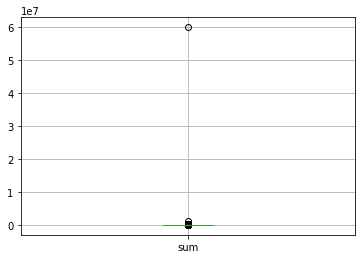

In [183]:
# Do the same, but by sum of sum
quantity_means2 = df[['id_card_int', 'sum']].groupby('id_card_int').agg('sum').sort_values('sum', ascending=False)
quantity_means2.boxplot()

In [184]:
quantity_means2[quantity_means2['sum'] > 10000000]

,sum
id_card_int,
883386,60016231.51


In [185]:
temp = pd.DataFrame()
temp['id_card_int'] = quantity_means2.index
outliers.extend(list(temp['id_card_int']))

Step 3. Check if there are negative values for sums and quantities

In [186]:
df[df['sum'] < 0].head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int,day
4206092,2020-09-04 09:10:21,827B9591-75EE-EA11-B444-005056A7539A,0,7009929,23074,19269,1.268,-470.43,False,1301664,11939194,2020-09-04
4206102,2020-09-04 09:09:24,F6807973-75EE-EA11-B444-005056A7539A,0,7707981,23074,19269,1.268,-470.43,False,1419650,22549976,2020-09-04
4210124,2020-09-04 08:37:00,49C21AF5-70EE-EA11-B444-005056A7539A,0,5554550,23074,19269,1.084,-402.16,False,1035577,6745380,2020-09-04
4218019,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,0.001,-0.37,False,126995,16694740,2020-09-04
4218021,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,2.375,-881.13,False,126995,16694740,2020-09-04


In [187]:
df[df['quantity'] < 0].head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int,day
4206093,2020-09-04 09:10:21,827B9591-75EE-EA11-B444-005056A7539A,0,7009929,23074,19269,-1.268,470.43,False,1301664,11939194,2020-09-04
4206103,2020-09-04 09:09:24,F6807973-75EE-EA11-B444-005056A7539A,0,7707981,23074,19269,-1.268,470.43,False,1419650,22549976,2020-09-04
4210123,2020-09-04 08:37:00,49C21AF5-70EE-EA11-B444-005056A7539A,0,5554550,23074,19269,-1.084,402.16,False,1035577,6745380,2020-09-04
4218020,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,-0.001,0.37,False,126995,16694740,2020-09-04
4218022,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,-2.375,881.13,False,126995,16694740,2020-09-04


In [188]:
outliers.extend(list(df[df['quantity'] < 0]['id_card_int']))
outliers.extend(list(df[df['sum'] < 0]['id_card_int']))

In [189]:
len(list(set(outliers)))

1944075

In [195]:
with bz2.open('outliers.pkl.bz2', 'wb') as f:
    pickle.dump(list(sorted(set(outliers))), f, protocol=4)

Additional: Check for persons daily buyings

In [190]:
many_same_tov = df.groupby(['id_card_int', 'day', 'id_tov'])

In [191]:
many_same_tov.agg('sum').sort_values('quantity', ascending=False)

,,,id_order,id_kontr,quantity,sum,is_green,id_doc_int
id_card_int,day,id_tov,,,,,,
310200,2020-11-26,1113,0,-49995,25000.0,0.00,0,64609182
208,2020-11-10,1113,0,-49995,24000.0,0.00,0,67547956
1750923,2020-11-21,1113,0,-49995,22000.0,0.00,0,39555072
978368,2020-09-25,1113,0,-39996,20000.0,0.00,0,45849144
978352,2020-11-11,1113,0,-39996,20000.0,0.00,0,59473062
...,...,...,...,...,...,...,...,...
1766517,2020-09-28,21335,0,16860,0.0,1.14,0,3284492
29462,2020-09-30,690,0,17394,0.0,0.56,0,3367001
1766517,2020-09-28,21259,0,16990,0.0,0.20,0,21827469


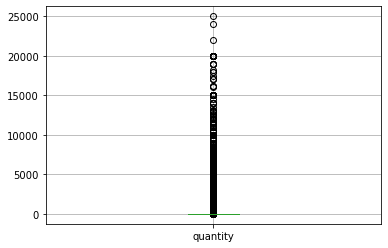

In [192]:
many_same_tov.agg('sum').sort_values('quantity', ascending=False).boxplot(column=['quantity'])